# Linear Regression <img src="reports/icon.png" align="center" height=auto width=10%/>

O algoritmo de _linear regression_ tem o objetivo de encontrar a melhor reta que se ajusta nos dados.


Basicamente a ideia de uma _linear regression_ é dar pequenos espaços entre os pontos para que a reta se aproxime de todos os pontos.

## Summary
  - [Advantages](#advantages)
  - [Disadvantages](#disadvantages)
  - [Linear Regressions Types](#)
    - [Linear Regression](#)
    - [Polinomial Regression](#)
    - [Lasso Regression](#)
    - [Ridge Regression](#)
    - [Logistic Regression](#)
  - [Cost Functions](#cost-functions)
  - [Gradient Descent](#gradient-descent)
  - [Regularization](#)
  - [Examples](#)
    - [Examples](#)
    - [Examples](#)
    - [Examples](#)
    - [Examples](#)

## **Advantages**
- Otima solução quando a relação entre as variáveis dependentes(y) e independentes(x) geram uma linha. 
- Encontrar correlação entre variáveis
- Fácil de encontrar outliers
- Quando tentar prever um valor contínuo - como preço, demanda, ou um índice qualquer - sempre comece usando regressão linear antes de tentar outros algoritmos de AM mais complexos.
- Mesmo com milhões de dados, é possível estimar os parâmetros em menos de um segundo. Além disso, uma vez treinado, o regressor ocupa muito pouco espaço, pois só armazena o vetor w^w^. 
- O modelo de regressão linear é de longe o mais utilizado em econometria

## **Disadvantages** 

#### Linear Regression
A regressão linear nem sempre é a melhor escolha dependendo da situação. Exemplos:
- **Regressão linear funciona melhor quando os dados são lineares:** 
A regressão linear produz um modelo que é uma linha reta extraída a partir dos dados de treinamento

<img src="reports/output_30_0.png" align="center" height=auto width=50%/>

Uma grande limitação do modelo de regressão linear é que a máquina não aprende a forma da não linearidade, ficando essa parte sob responsabilidade da pessoa que está montando o modelo. Em outras palavras, é preciso codificar à força a não linearidade no algoritmo e isso é feito forjando variáveis novas. 

- **Regressões lineares são sensíveis a casos extraordinários:** 
A regressão linear tenta encontrar a linha que "melhor se encaixa" nos dados de treinamento. Caso o conjunto de dados tenha valores extremos que fujam muito do padrão geral, eles podem ter um efeito inesperadamente grande no modelo.

<img src="reports/output_32_0.png" align="center" height=auto width=50%/>


#### Polynomial Regression
- Problema de overfit que gera uma lata variância

<img src="reports/overfit_variance.png" align="center" height=100% width=60%/>

- não funciona bem quando temos muitas variáveis e o grau do polinômio é muito alto


#### Logistic Regression

**TODO**

---

# **Linear Regressions Types**
Até 100k linhas pode ser usado os modelos abaixo, acima disso é recomendado usar algum modelo de deep learning.

## Linear Regression

<img src="reports/output_4_0.png" align="center" height=100% width=60%/>

O **w** tambem é chamado de preditor.

<img src="reports/output_5_0.png" align="left" height=100% width=60%/>

<img src="reports/output_6_0.png" align="right" height=100% width=60%/>

<img src="reports/output_7_0.png" align="left" height=100% width=60%/>

<img src="reports/output_8_0.png" align="right" height=100% width=60%/>

<img src="reports/output_9_0.png" align="left" height=100% width=60%/>

## Multiple Linear Regression

A regressão linear simples é útil para prever o valor de uma variável dependente por uma variável independente. Contudo, este tipo de regressão não é muito útil no contexto real pois sempre há mais de um fator que pode influenciar uma variável dependente (y).


Por exemplo, no caso abaixo temos o preço das casas (y = variável dependente) que é afetado pela qualidade de ensino das escolas proximas (x1) e pelo tamanho da casa(x2). 

<img src="reports/output_24_0.png" align="center" height=100% width=60%/>

A partir disso, observamos que o preço de uma casa (y) pode ser afetado (ser dependente) por N variáveis(x).

<img src="reports/output_26_0.png" align="center" height=100% width=60%/>

<img src="reports/output_27_0.png" align="center" height=100% width=60%/>

<img src="reports/output_28_0.png" align="center" height=100% width=60%/>

## Polinomial Regression
_E com duas ou três variáveis posso fazer uma regressão polinonial_

É possível utilizar o fato de estender regressão linear para regressão polinomial. A ideia é bastante simples: a partir das variáveis existentes, nós vamos construindo novas variáveis polinomiais e a regressão com elas terá mais capacidade quanto maior o grau do polinômio criado. É importante ressaltar que o algoritmo de regressão linear não muda!

<img src="reports/poly.png" align="center" height=50% width=40%/>


- Uma técnica comum em machine learing é usar _linear models_ treinados em dados não lineares.
- A grande vantagem é a radipez para treinamento
-  Uma regressão linear simples pode ser estendida através da construção de features polinomiais a partir dos coeficientes.
- Ex

In [116]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# data
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [117]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

As features de `X` foram transformados de `[a, b]` para `[1, a, b, a^2, ab, b^2]`, e agora pode ser usado em qualquer modelo linear.

#### Quando usar uma regressão polinomial?

É recomendável utilizar regressão polinomial apenas em casos de não linearidades mais simples (**até grau = 2**), por exemplo quando se desconfia de alguma relação marginalmente (imagem abaixo).


<img src="reports/marginal_decrese.png" align="center" height=50% width=40%/>

#### Creating Polynomial Model

In [103]:
#### Import

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [104]:
# Sata
df = pd.read_csv('data/raw/pressure_temperature.csv')
X = df.iloc[:, 1:2].values 
y = df.iloc[:, 2].values 

print(df.head())
print(X.shape)
print(y.shape)

   sno  Temperature  Pressure
0    1            0    0.0002
1    2           20    0.0012
2    3           40    0.0060
3    4           60    0.0300
4    5           80    0.0900
(6, 1)
(6,)


#### Linear Model

In [105]:
# Fitting Linear Regression
lr_model = LinearRegression() 
lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

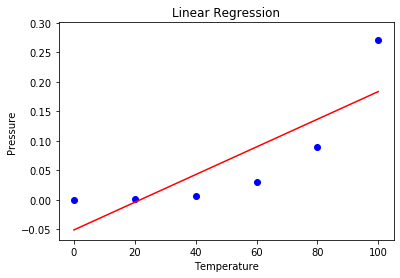

In [106]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lr_model.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 

plt.show() 

#### Polynomial Model

In [109]:
# Fitting Polynomial Regression
poly = PolynomialFeatures(degree=4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
polymonial_model = LinearRegression() 
polymonial_model.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

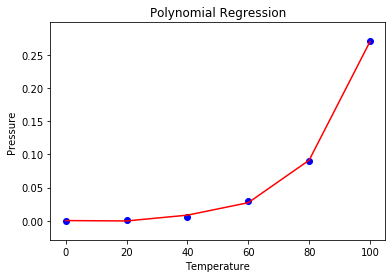

In [110]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, polymonial_model.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

#### Tradeoff 
 
O modelo com polinômio de grau 4 acerta mais os dados mas é provável que a **_varience_ dele seja muito alta**, podendo comprometer a performance de generalização.

Por outro lado, o modelo com polinômio de grau 1 não consegue sequer capturar as curvaturas dos dados de treino. Assim, podemos especular que esse modelo **tem _bias_ muito baixo**.

<img src="reports/overfit.gif" align="center" height=50% width=40%/>


## Logistic Regression

**TODO**
- https://matheusfacure.github.io/2017/02/25/regr-log/

---

## **Cost Function**
- É a diferença entre o valor real e o valor predito.
- Resíduo = erro médio absoluto
- Cost Function = Error Function 

#### Cost ?
Uma função que mapeia um evento ou valores de uma ou mais variáveis ​​para um número real, representando intuitivamente algum "custo" associado ao evento.

<img src="reports/variables_linear_regression.png" align="center" height=100% width=60%/>

<img src="reports/output_11_0.png" align="center" height=100% width=60%/>

<img src="reports/output_12_0.png" align="center" height=100% width=60%/>

### MSE(Mean Squared Error) 
É possivel calcular um erro médio quadrático.

<img src="reports/output_14_0.png" align="center" height=100% width=60%/>

<img src="reports/mse.png" align="center" height=100% width=60%/>

 - OBS: a única difrença para o que eu vi em técnicas estatíticas de predição foi a derivação da fórmula.
 
### Comparison of error types

<img src="reports/output_17_0.png" align="center" height=100% width=60%/>

#### Mean absolute error
Indiferente da reta, sempre dará o mesmo tamanho de erro.

#### Mean Square Error
Neste caso temos uma função de 2º grau, onde a linha B se encontra no ponto mais baixo.

<img src="reports/output_20_0.png" align="center" height=100% width=60%/>


#### Mean absolute error x Mean Square Error

<img src="reports/cost-median-mean.png" align="center" height=100% width=60%/>

- Quando usar um e outro ?
Na prática, depende muito pois o que causa é a alteração no _learning rate_.

In [111]:
import matplotlib.pyplot as plt
import numpy as np


# original data
X = [1, 2, 3]
y = [1, 2.5, 3.5]


hyps = 1.0 

In [112]:
# mutiply the original X values by hyps to produce hypothesis values for each X
def multiply_matrix(mat, hyps):
    mutated = []
    for i in range(len(mat)):
        mutated.append(mat[i] * hyps)

    return mutated


def calc_cost(m, X, y):
    '''
    Calculates the cost for given X, y and vector total (m)
    
    m = total vector of thetas
    X = Row of X's np.zeros((2,j))
    y = Actual y's np.zeros((2,1))
    '''
    total = 0
    
    for i in range(m):
        squared_error = (y[i] - X[i]) ** 2
        total += squared_error
    
    return (1/(2*m)) * total 

In [113]:
# calculate cost for hypothesis
hyp_values = multiply_matrix(X, hyps)

print("Cost for hypotesis ", hyps, " is ", calc_cost(len(X), y, hyp_values))

Cost for hypotesis  1.0  is  0.08333333333333333


---

## **Gradient Descent**
_Gradient Descent is the method by which we make our model learn._

<img src="reports/gradient_decent.png" align="center" height=100% width=60%/>

<img src="reports/gratient_cost.png" align="center" height=100% width=60%/>


- É algoritmo de otimização para encontrar mínimo global.
- É recomendado para casos de com > 100 features

<img src="reports/less_100.png" align="center" height=100% width=60%/>

Menos que isso, a sugestãõ é usar algo analítico.



No caso da nossa regressão linear por gradiente descendente, podemos distinguir três hiper-parâmetros:

- A taxa de aprendizado
- O número de iterações de treino
- Os valores iniciais de w^w^

- Easy to implement
- Requires less memory and processing

Exemplo da montanha
- imagine que vc esta no alto de uma montanha e deseja descer de olhos fechados.
- descer é equivalente a aproximar a reta dos pontos.

<img src="reports/gradient_descent.png" align="center" height=100% width=60%/>

<img src="reports/gradient_descent_2.png" align="center" height=100% width=60%/>

<img src="reports/gradient_descent_3.png" align="center" height=100% width=60%/>


#### Speed
Quando falamos de uma bolinha de gude deslizando para o fundo de uma tigela, podemos visualizar a bolinha começando com uma pequena velocidade e acelerando ao longo do trajeto. Com gradiente descendente ocorre o oposto: inicialmente, os parâmetros b^ e w^ caminham rapidamente em direção ao ponto de mínimo e, quanto mais se aproximam dele, passam a caminhar cada vez mais devagar.

#### Why ?
Quanto mais próximos estamos do ponto de mínimo, menor a inclinação da função custo, OU SEJA menor o gradiente, OU SEJA, menor o passo dado em direção ao mínimo.


#### Graphic
- Para minimizar os erros basta calcular a derivada da função de erro.
- Use a regra da cadeia
- Quanto mais baixo estiver o valor de _error_, menor é a taxa de aprendizagem α.

<img src="reports/gardient_descent_mat.png" align="center" height=100% width=60%/>

<img src="reports/cost_fucntion.png" align="center" height=100% width=60%/>

### Visualization

<img src="reports/random.gif" align="center" height=100% width=60%/>

<img src="reports/graddesc.gif" align="center" height=100% width=60%/>

1. Insira parâmetros aleatórios
2. Calcule a _cost fucntion_
3. Aplique a regra da cadeia na _cost function_ até encontrar o menor valor

In [114]:
X = 3
learning_rate = 0.01 # Learning rate
precision = 0.000001 # Stop loop
previous_step_size = 1 
max_iters = 10000 # Maximum number of iterations
count = 0 # Iteration counter

# derivate cost function
derivative_function = lambda x: 2*(x+5) 

In [115]:
while previous_step_size > precision and count < max_iters:
    current_x = X
    X = X - learning_rate * derivative_function(current_x) # Grad descent
    
    previous_step_size = abs(X - current_x)
    count = count + 1
    # print("Iteration",count,"\nX value is",X) 
    
print("The local minimum at", X)

The local minimum at -4.9999518490318176


---

## **Regularization**
_Regularization basically adds the penalty as model complexity increases._


<img src="reports/regularization_g.gif" align="center" height=100% width=60%/>

- É uma técnica para evitar overfit
- Tranforma modelos complexos em modelos mais simples
- É usado para regressão linear e polinomial
- Ex

<img src="reports/regularizaion.png" align="center" height=100% width=60%/>

#### Complexity Calculate
Para calcular qual modelo generaliza melhor é preciso calcular a complexidade:

```
complexity = error + coefficients
```

<img src="reports/regularization_2.png" align="center" height=100% width=60%/>



#### Rugularization Types

Há 2 tipos de regularização
- Lasso - L1

<img src="reports/regularization_ex_1.png" align="center" height=100% width=60%/>

<img src="reports/regularization_ex_2.png" align="center" height=100% width=60%/>

- Rigde - L2

<img src="reports/l2_reg.png" align="center" height=100% width=60%/>

<img src="reports/l2_reg_2.png" align="center" height=100% width=60%/>

#### Comparation
<img src="reports/sheet_cheat_regu.png" align="center" height=100% width=60%/>

### Comparation Linear, Lasso and Ridge Regression

In [13]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [14]:
from sklearn.linear_model import LinearRegression


linear_regression = LinearRegression()
linear_regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
from sklearn.linear_model import Lasso


linear_regression_regularization_l1 = Lasso(alpha=0.1)
linear_regression_regularization_l1.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
from sklearn.linear_model import Ridge


linear_regression_regularization_l2 = Ridge(alpha=0.1)
linear_regression_regularization_l2.fit(X, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Predict

In [17]:
linear_regression.predict([[1, 1]])

array([1.])

In [18]:
linear_regression_regularization_l1.predict([[1, 1]])

array([0.8])

In [19]:
linear_regression_regularization_l2.predict([[1, 1]])

array([0.95454545])

---

## **Modeling Linear Models**

1. Insira uma _linear regression_ em qualquer ponto do gráfico

<img src="reports/mean.png" align="center" height=100% width=60%/>

2. Em seguida, calcule a **cost function**
3. Para encontrar o melhor local onde a reta se encaixa nos dados, calcule o **gradient descent**

<img src="reports/linear.png" align="center" height=100% width=60%/>

2. Caso os dados não sejam lineares será necessário **gerar um polinômio**. Começe pelo grau = 2

<img src="reports/poly_1.png" align="center" height=100% width=60%/>

3. Para diminuir o _bias_, é preciso **aumentar o grau do polinômio** para 10

<img src="reports/poly_2.png" align="center" height=100% width=60%/>

4. Agora, para garatir uma menor _variance_, será aplicado uma **regularization** no modelo

<img src="reports/poly_3.png" align="center" height=100% width=60%/>


#### Analysis Polynomial Model

- O modelo começa como uma _linear regression_ com _regularization_ e vai aumentando o grau do polinômio

<img src="reports/polinomial_regression.gif" align="center" height=50% width=40%/>

#### References
- [1] https://moodle.ufsc.br/pluginfile.php/1592338/mod_resource/content/1/An%C3%A1lise%20da%20regres%C3%A3o.pdf
- [2] https://www.coursera.org/learn/machine-learning/
- [3] https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1
- [4] https://en.wikipedia.org/wiki/Gradient_descent
- [5] https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
- [6] https://matheusfacure.github.io/2017/02/16/ols-mechanics/
- [7] http://madrury.github.io/smoothers/

---